<a href="https://colab.research.google.com/github/nandaglhp/02_praktikum_web_lanjut_dua/blob/master/Kuis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anggota Kelompok:

- Ananda Galih Pratiwi (05 - 2141720045)
- Alvina Marcy Syakirah P. (03 - 2141720017)
- Magfiroh Indah Karisma (17 - 2141720180)

# Kuis Praktikum
1. Bentuk kelompok beranggotakan maksimal 3 orang
2. Lakukan foto KTM setiap anggota kelompok menggunakan kamera smartphone yang berbeda dari setiap anggota (contoh: satu kelompok berisi mahasiswa A, B, dan C. Setiap dari si A, B, dan C memotret KTM miliknya dan KTM temannya lain dalam satu kelompok, sehingga total dataset yang dimiliki adalah 9 citra KTM)
3. Di dalam Google Drive, buat folder dataset, di dalam folder dataset, buat folder sesuai merkdan tipe smartphone yang digunakan (contoh: SamsungS21Ultra, PocoX3, dll) dan masukkan setiap hasil foto dari setiap smartphone ke folder dengan nama yang sesuai.
4. Bagikan folder dataset ke setiap anggota kelompok dan email: enggar@polinema.ac.id
5. Lakukan preprocessing ke setiap citra dataset
6. Lakukan deteksi object karakter huruf dan angka untuk setiap citra dataset.
7. Tunjukkan setiap hasil nomor 5 dan 6 di dalam Google Colab.
8. Bagikan Google Colab ke email: enggar@polinema.ac.id.
9. Buat video presentasi (tampak muka dan terdengar suara) hasil pengerjaan kuis praktikum, cantumkan video pada Google Colab.
10. Jaga agar folder dataset dan Google Colab tidak terset sebagai public, tetap bagikan sesuai ketentuan nomor 4.

In [37]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [38]:
import os
import cv2
import matplotlib.pyplot as plt

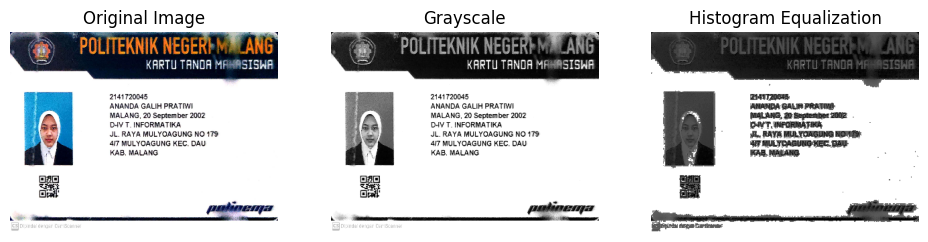

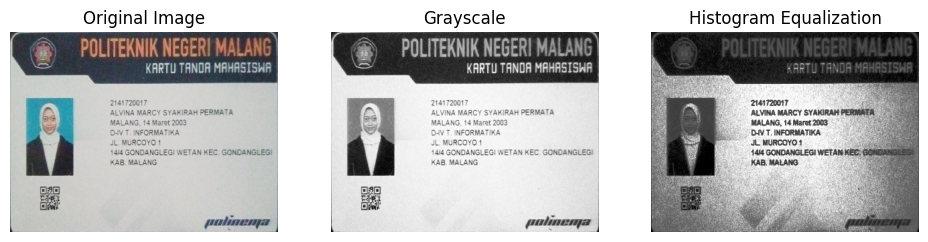

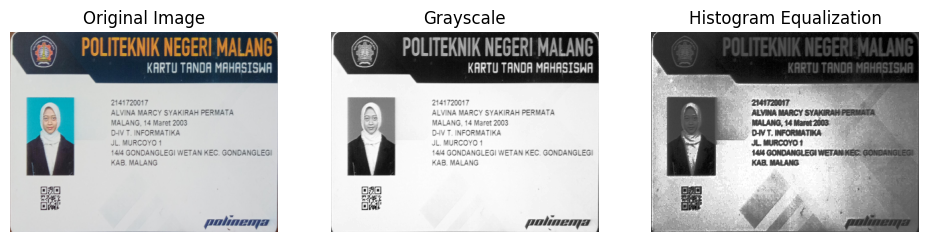

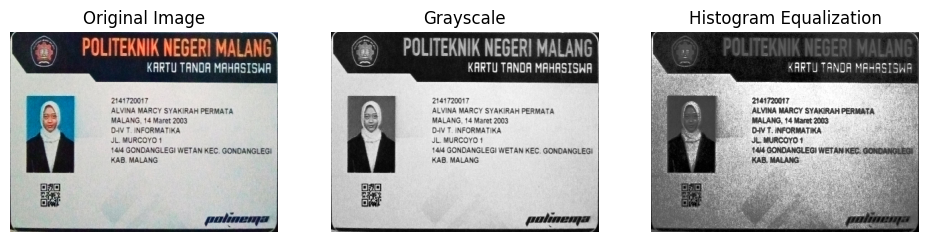

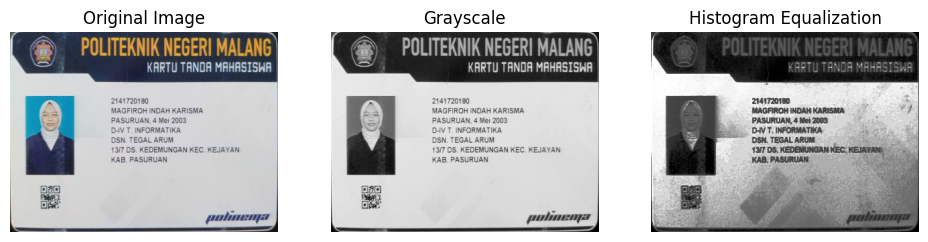

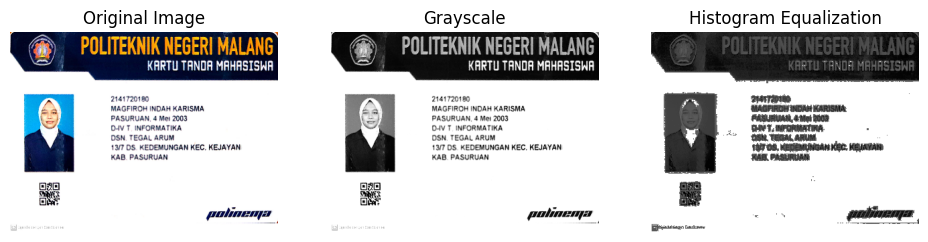

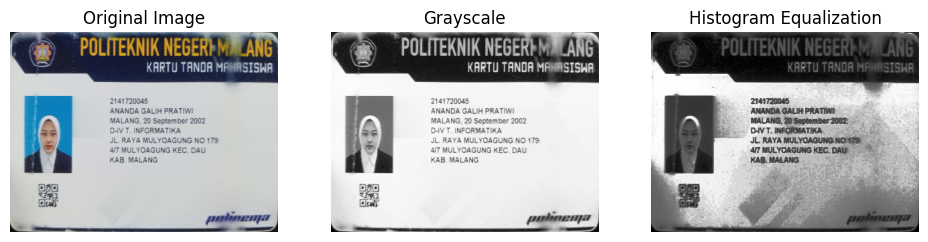

In [40]:
# Direktori citra KTM
direct_data = '/content/MyDrive/MyDrive/College/05 - Semester 5/PCVK/Kuis_Kelompok2/Dataset/KTM_KEL2/All_KTM'

# Ambil daftar file dalam direktori
files = os.listdir(direct_data)

# Loop melalui semua gambar dalam direktori
for i, img_file in enumerate(files, start=1):
    img_path = os.path.join(direct_data, img_file)
    img = cv2.imread(img_path)

    # PREPROCESSING
    # (1) Resize the image
    img = cv2.resize(img, (400, 300))

    # (2) Convert to Grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # (3) Histogram Equalization
    equalized_img = cv2.equalizeHist(gray_img)

    # Create a larger figure for displaying images
    plt.figure(figsize=(20, 6))

    # Gambar asli
    plt.subplot(151)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Grayscale image (PREPROCESSING)
    plt.subplot(152)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    # Equalized Image (PREPROCESSING)
    plt.subplot(153)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Histogram Equalization')
    plt.axis('off')

    plt.show()


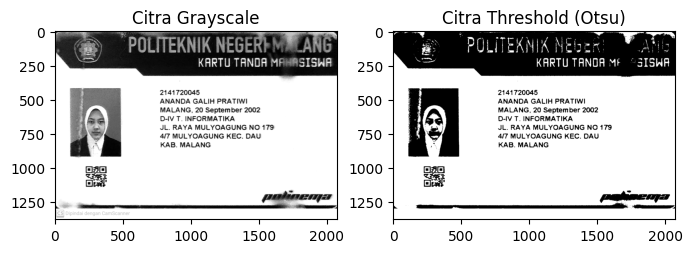

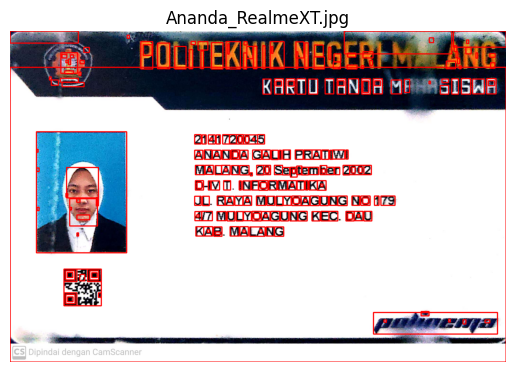

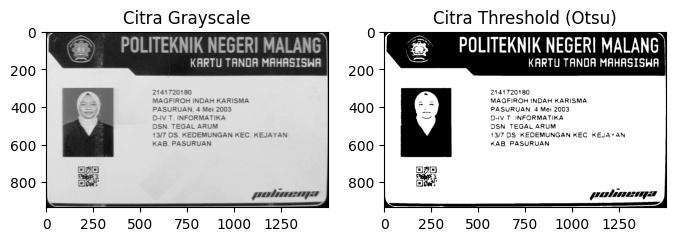

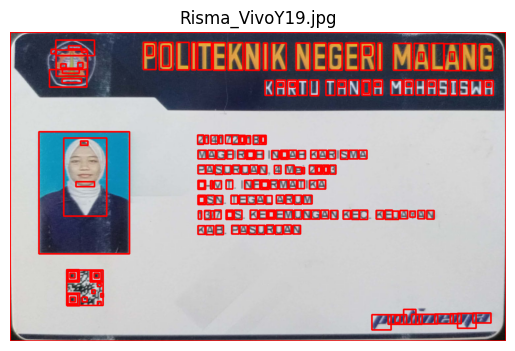

In [48]:
# Lokasi hasil pelat
path_plate = "/content/MyDrive/MyDrive/College/05 - Semester 5/PCVK/Kuis_Kelompok2/Dataset/KTM_KEL2/All_KTM"

# Nama file yang ingin diproses
ktm_files = ["Ananda_RealmeXT.jpg", "Alvina_OppoA31,jpg", "Risma_VivoY19.jpg"]

# Looping untuk setiap file KTM
for ktm in ktm_files:
    if ktm in os.listdir(path_plate):
        image_path = os.path.join(path_plate, ktm)
        src = cv2.imread(image_path)
        blurred = src.copy()

        # Filtering
        for i in range(10):
            blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

        # Ubah ke grayscale
        gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
        ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Operasi morfologi
        kernel = np.ones((1, 1), np.uint8)
        eroded_image = cv2.erode(bw, kernel, iterations=1)

        # Menampilkan citra hasil pra-pemrosesan
        plt.figure(figsize=(8, 8))
        plt.subplot(121)
        plt.imshow(gray, cmap='gray')
        plt.title('Citra Grayscale')

        plt.subplot(122)
        plt.imshow(bw, cmap='gray')
        plt.title('Citra Threshold (Otsu)')

        plt.show()

        # Ekstraksi kontur
        contours, hierarchy = cv2.findContours(eroded_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

        # Looping contours untuk mendapatkan kontur yang sesuai
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            ras = format(w / h, '.2f')
            if h >= 40 and w >= 10 and float(ras) <= 1:
                cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=4)
            elif h >= 10 and w >= 6 and float(ras) <= 6:
                cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=4)
            elif h >= 15 and w >= 6 and float(ras) <= 7:
                cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=4)

        # Menampilkan gambar image dengan kontur
        image_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title(ktm)
        plt.axis('off')
        plt.show()


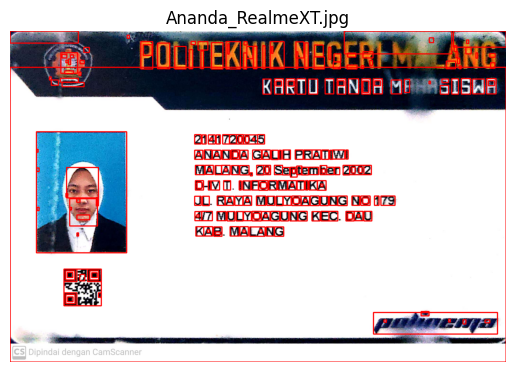

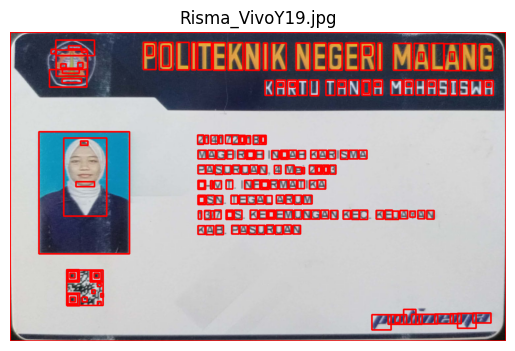

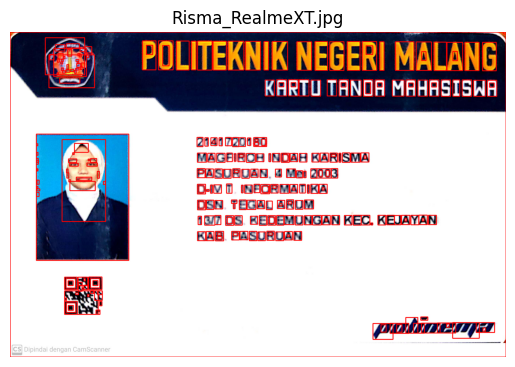

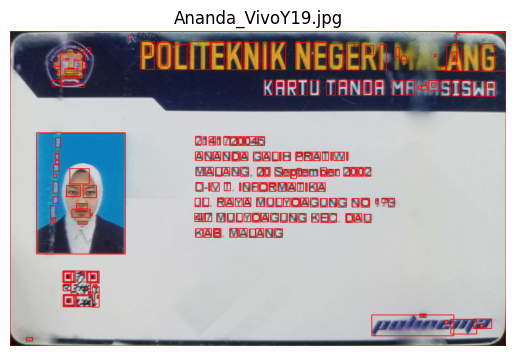

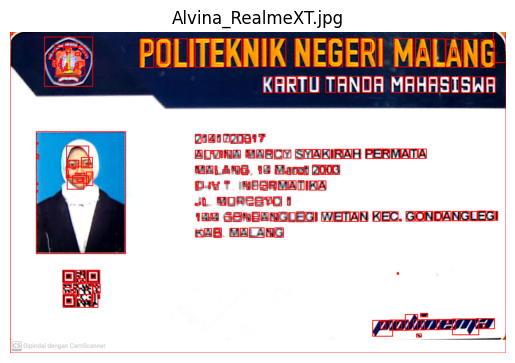

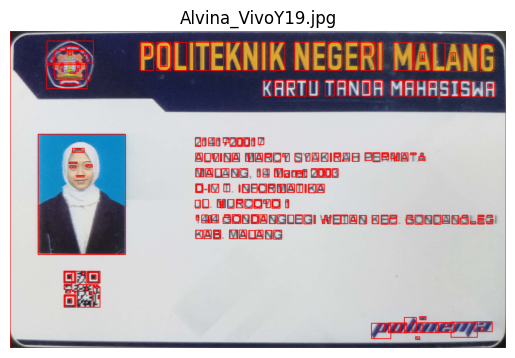

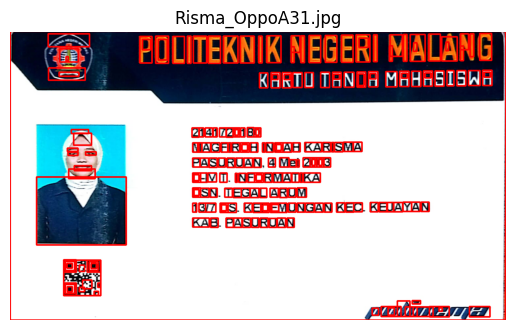

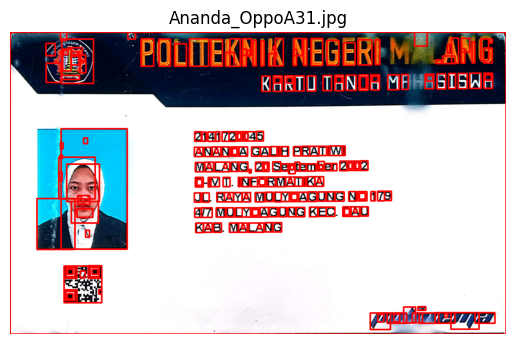

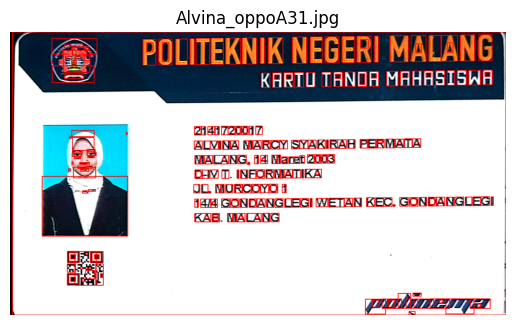

In [49]:
# Direktori tempat gambar-gambar berada
path_plate = "/content/MyDrive/MyDrive/College/05 - Semester 5/PCVK/Kuis_Kelompok2/Dataset/KTM_KEL2/All_KTM"

# Mengambil daftar file dalam direktori
file_names = os.listdir(path_plate)

# Looping untuk memproses setiap foto dalam direktori
for file_name in file_names:
    if file_name.endswith('.jpg'):
        image_path = os.path.join(path_plate, file_name)
        src = cv2.imread(image_path)
        blurred = src.copy()

        # Filtering
        for i in range(10):
            blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

        # Ubah ke grayscale
        gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
        ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Operasi morfologi
        kernel = np.ones((1, 1), np.uint8)
        eroded_image = cv2.erode(bw, kernel, iterations=1)

        # Ekstraksi kontur
        contours, hierarchy = cv2.findContours(eroded_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

        # Looping contours untuk mendapatkan kontur yang sesuai
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            ras = format(w / h, '.2f')
            if h >= 40 and w >= 10 and float(ras) <= 1:
                cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=4)
            elif h >= 10 and w >= 6 and float(ras) <= 6:
                cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=4)
            elif h >= 15 and w >= 6 and float(ras) <= 7:
                cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=4)

        # Menampilkan gambar image dengan kontur menggunakan plt
        image_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title(file_name)
        plt.axis('off')
        plt.show()


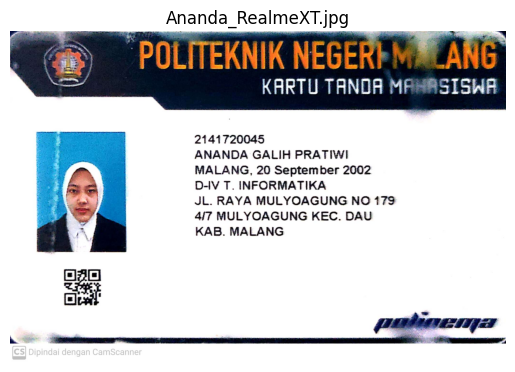

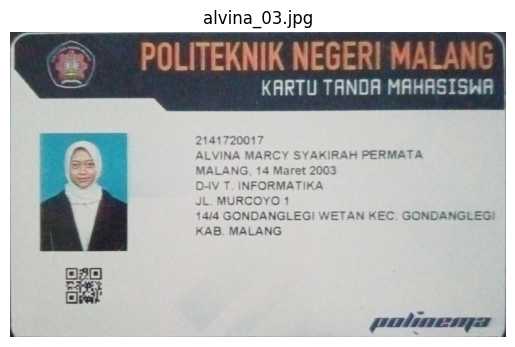

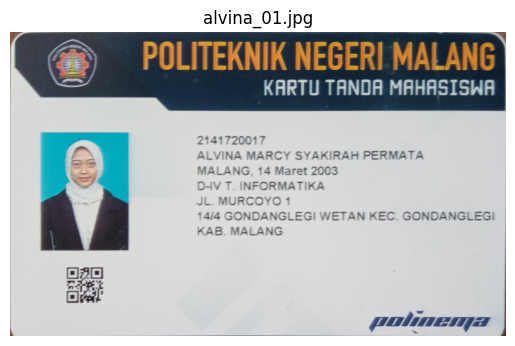

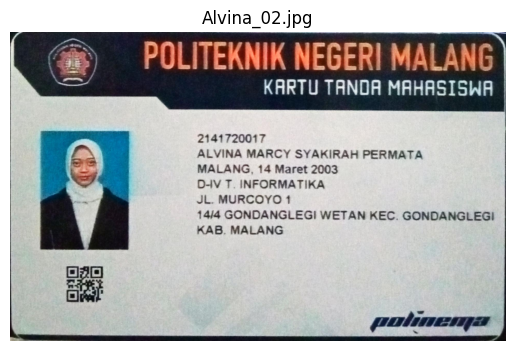

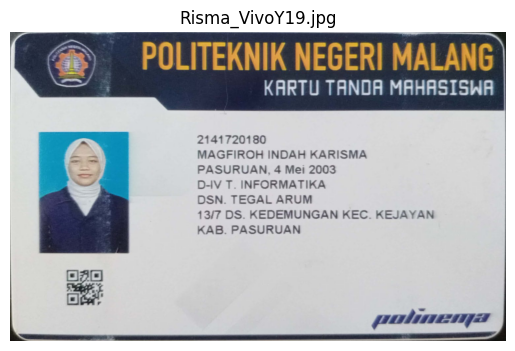

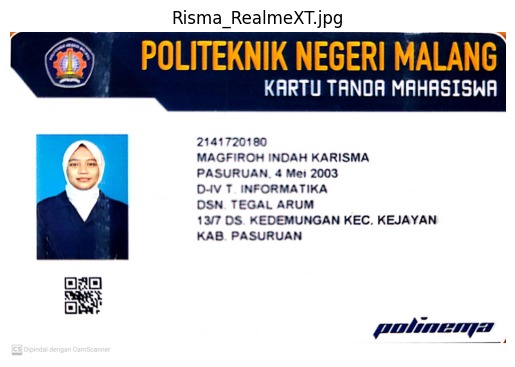

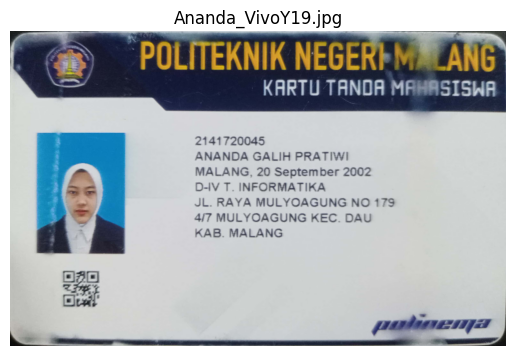

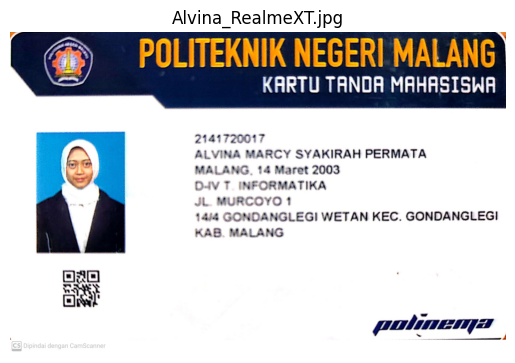

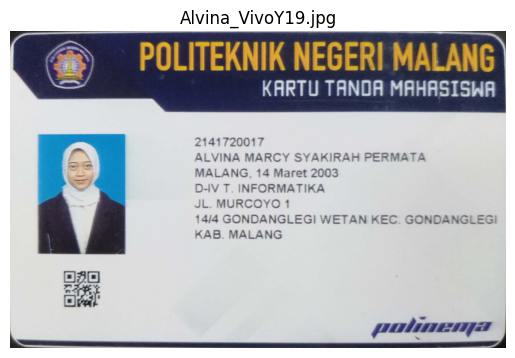

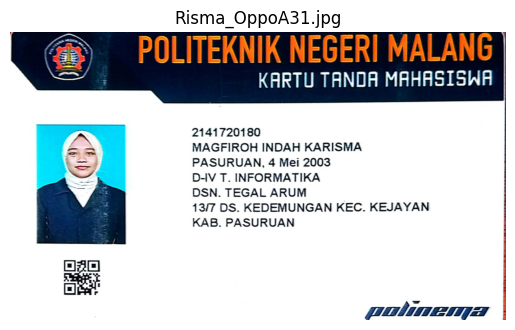

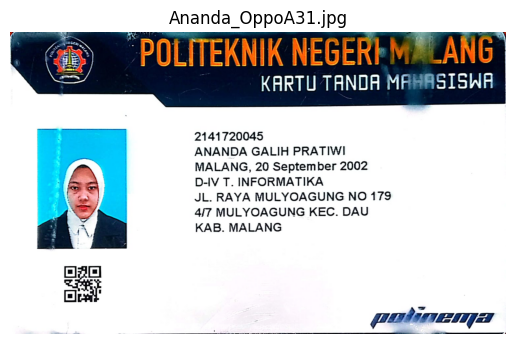

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random
from sklearn.cluster import KMeans
import math

directory = "/content/MyDrive/MyDrive/College/05 - Semester 5/PCVK/Kuis_Kelompok2/Dataset/KTM_KEL2/All_KTM"

# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)

    # Tampilkan gambar dengan nama file
    plt.figure()
    plt.title(img_file)  # Menambahkan judul berdasarkan nama file
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

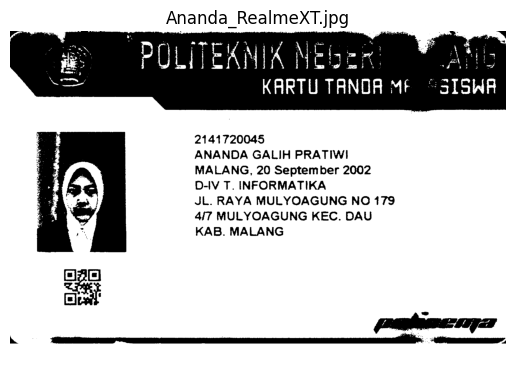

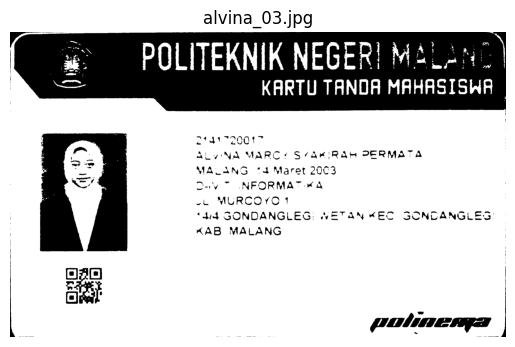

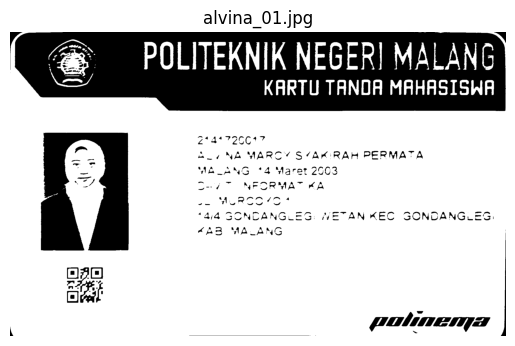

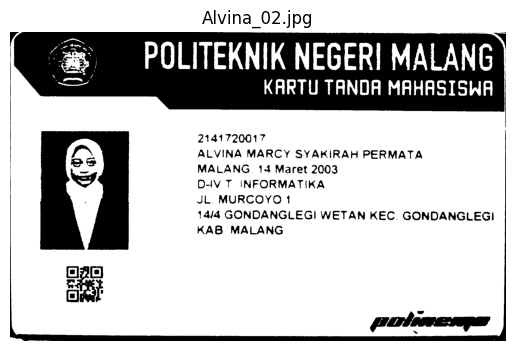

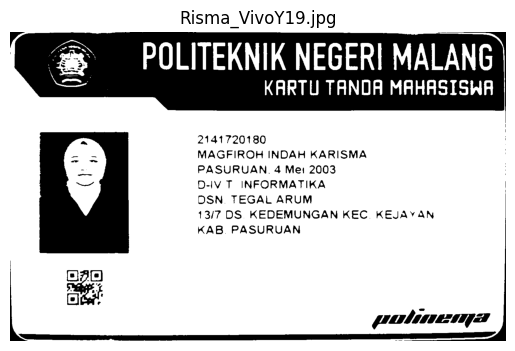

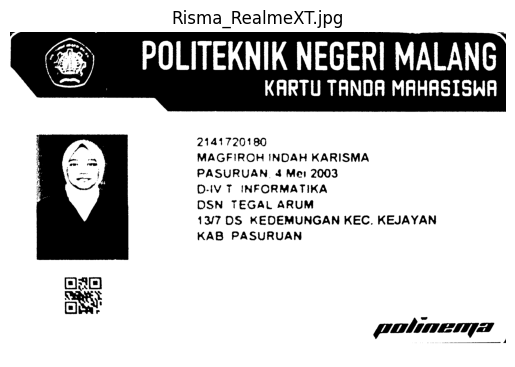

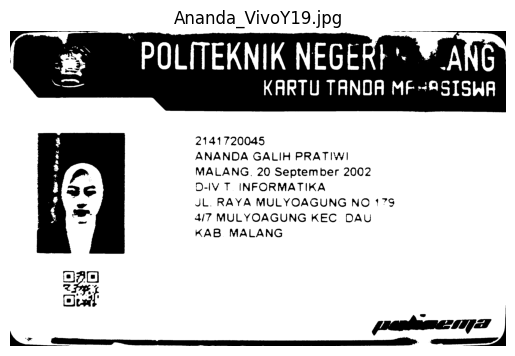

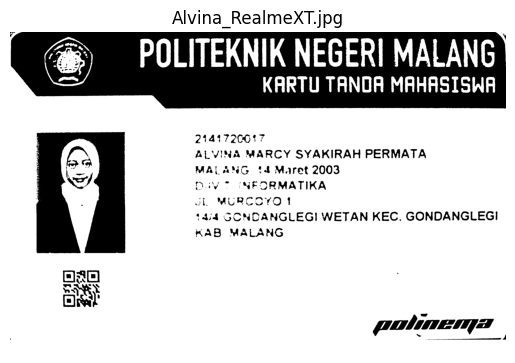

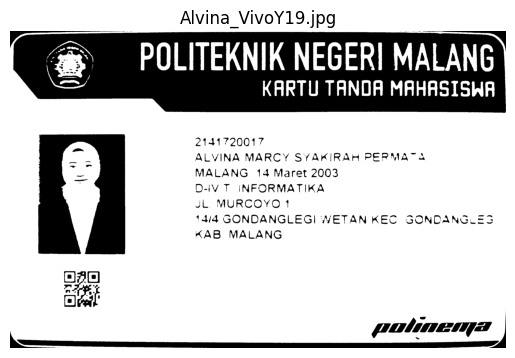

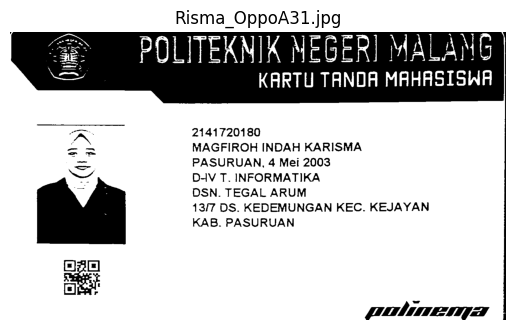

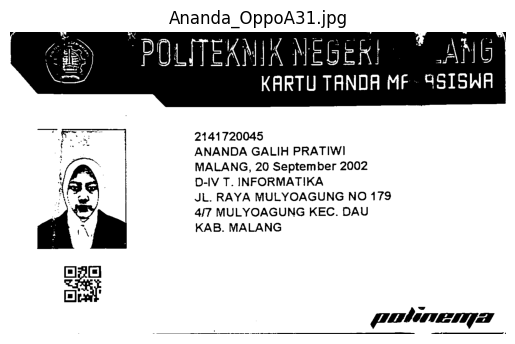

In [45]:
# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    ktm_img = cv2.imread(img_path)
    blurred = ktm_img.copy()
    gray = blurred.copy()

    blurred = cv2.GaussianBlur(ktm_img, (5, 5), 0.5)

    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Tampilkan citra hasil thresholding
    plt.imshow(bw, cmap='gray')
    plt.title(img_file)
    plt.axis('off')
    plt.show()

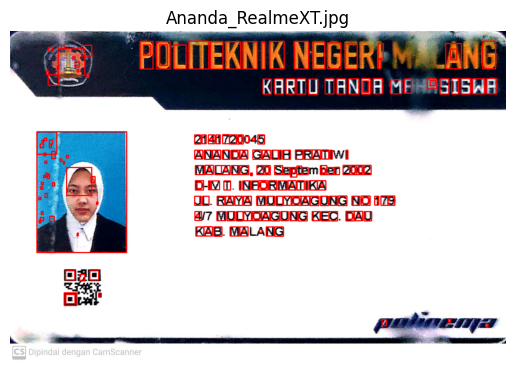

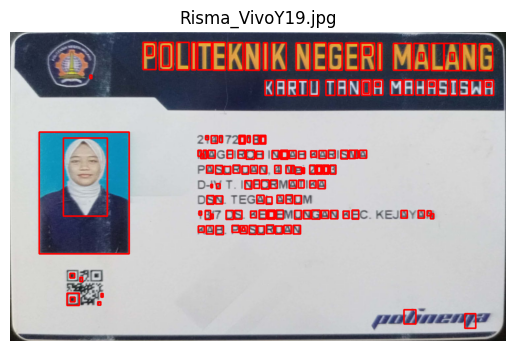

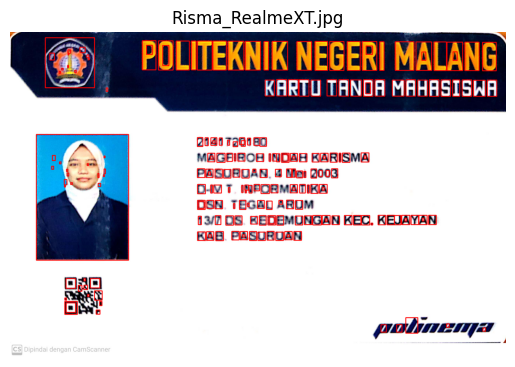

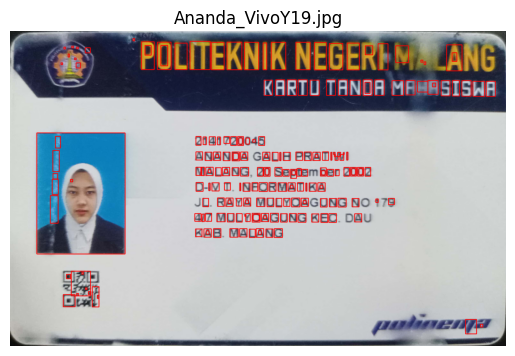

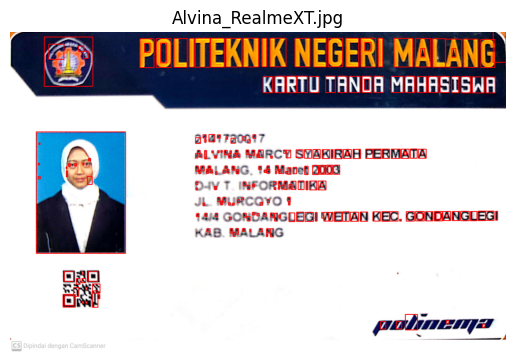

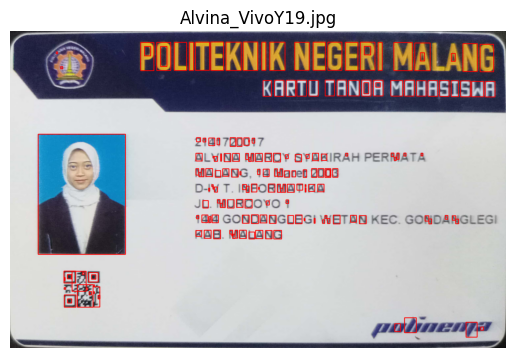

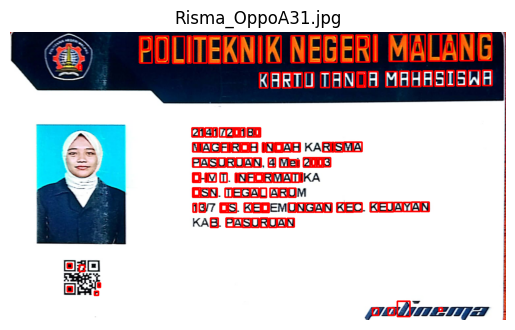

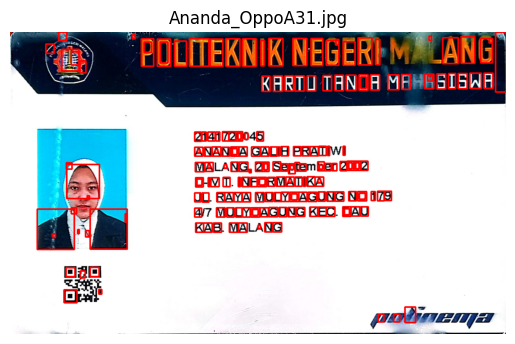

In [46]:
# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    # Baca gambar KTP
    ktmImage = cv2.imread(img_path)

    # Ubah gambar menjadi skala abu-abu untuk deteksi tepi
    gray = cv2.cvtColor(ktmImage, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5, 5) adalah ukuran kernel Gaussian, dan 0 adalah deviation

    # Thresholding untuk membuat gambar biner
    ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

    # Temukan kontur pada gambar tepi
    contours, hierarchy= cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # Gambar kontur pada gambar asli
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        ras = format(w / h, '.2f')
        if h >= 40 and w >= 10 and float(ras) <= 1:
            cv2.rectangle(ktmImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=3)
        elif h >= 10 and w >= 5 and float(ras) <= 1:
            cv2.rectangle(ktmImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=3)

    # Tampilkan gambar dengan kontur
    plt.imshow(cv2.cvtColor(ktmImage, cv2.COLOR_BGR2RGB))
    plt.title(img_file)
    plt.axis('off')
    plt.show()